In [1]:
%reload_ext autoreload
%autoreload 2

import os
import sys
import numpy as np
import py21cmfast as p21c
import h5py

WDIR = os.environ['DM21CM_DIR']
sys.path.append(WDIR)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import colormaps as cms
mpl.rc_file(f"{WDIR}/matplotlibrc")

/n/home07/yitians/.conda/envs/dm21cm/lib/python3.11/site-packages/py21cmfast/_cfg.py:58: UserWarning: Your configuration file is out of date. Updating...
  warnings.warn(
/n/home07/yitians/.conda/envs/dm21cm/lib/python3.11/site-packages/py21cmfast/_cfg.py:42: UserWarning: Your configuration file is out of date. Updating...
  warnings.warn("Your configuration file is out of date. Updating...")


In [2]:
outputs_dir = "/n/holylabs/LABS/iaifi_lab/Users/yitians/dm21cm/outputs"

bkg_fn = f"{outputs_dir}/bkg/LightCones/LightCone_z5.0_HIIDIM=128_BOXLEN=256_fisher_fid_r54321.h5"
elec_fn = f"{outputs_dir}/inhom-hom-cmp/inhom_elec_m1e7_lt1e25_stdastro/LightCones/Lightcone_I0_D0.h5"
phot_fn = f"{outputs_dir}/inhom-hom-cmp/inhom_phot_m5e3_lt1e26_stdastro/LightCones/Lightcone_I0_D0.h5"
phot_sb_fn = f"{outputs_dir}/xc/phot_decay_m5e3_lt1e26_d64/LightCone_z5.0_HIIDIM=64_BOXLEN=256_fisher_DM_1_r54321.h5"
phot_new_fn = f"{outputs_dir}/xc/phot_decay_m5e3_lt1e26_d128/LightCone_z5.0_HIIDIM=128_BOXLEN=256_fisher_DM_1_r54321.h5"

In [3]:
with h5py.File(bkg_fn, 'r') as hf:
    bkg_Tb_s = hf['global_quantities']['brightness_temp'][()]
    z_s = hf['node_redshifts'][()]
with h5py.File(elec_fn, 'r') as hf:
    elec_Tb_s = hf['global_quantities']['brightness_temp'][()]
with h5py.File(phot_fn, 'r') as hf:
    phot_Tb_s = hf['global_quantities']['brightness_temp'][()]
with h5py.File(phot_sb_fn, 'r') as hf:
    phot_sb_Tb_s = hf['global_quantities']['brightness_temp'][()]
with h5py.File(phot_new_fn, 'r') as hf:
    phot_new_Tb_s = hf['global_quantities']['brightness_temp'][()]

# lc_bkg = p21c.LightCone.read(bkg_fn)
# z_s = lc_bkg.lightcone_redshifts
# with h5py.File(bkg_fn, 'r') as hf:
#     bkg_Tb_s = np.mean(hf['lightcones']['brightness_temp'][()], axis=(0,1))
# with h5py.File(elec_fn, 'r') as hf:
#     elec_Tb_s = np.mean(hf['lightcones']['brightness_temp'][()], axis=(0,1))
# with h5py.File(phot_fn, 'r') as hf:
#     phot_Tb_s = np.mean(hf['lightcones']['brightness_temp'][()], axis=(0,1))

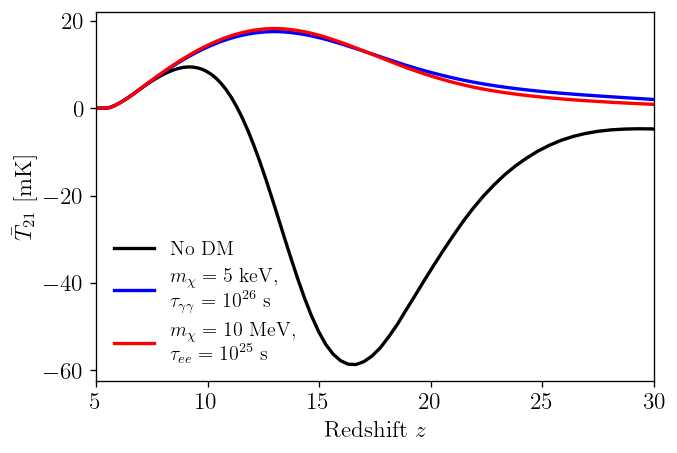

In [42]:
fig, ax = plt.subplots(figsize=(6, 4))

ax.plot(z_s, bkg_Tb_s, label='No DM', lw=2, color='k')
ax.plot(z_s, phot_Tb_s, label=r'$m_\chi=5$ keV,' + '\n' + r'$\tau_{\gamma\gamma}=10^{26}$ s', lw=2, color='b')
ax.plot(z_s, elec_Tb_s, label=r'$m_\chi=10$ MeV,' + '\n' + r'$\tau_{ee}=10^{25}$ s', lw=2, color='r')

ax.set(xlim=(5, 30))
ax.set(xlabel=r'Redshift $z$', ylabel=r'$\bar T_{21}$ [mK]')
ax.legend(loc='lower left', fontsize=12, frameon=False)

fig.savefig('plots/globals.pdf')

[Text(0.5, 1.0, '$m_\\chi=5$ keV, $\\tau_{\\gamma\\gamma}=10^{26}$ s')]

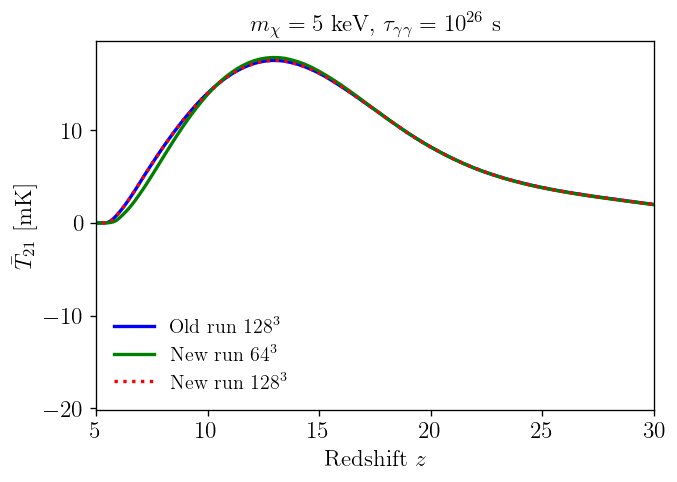

In [8]:
fig, ax = plt.subplots(figsize=(6, 4))

#ax.plot(z_s, bkg_Tb_s, label='No DM', lw=2, color='k')
ax.plot(z_s, phot_Tb_s, label='Old run 128$^3$', lw=2, color='b')
ax.plot(z_s, phot_sb_Tb_s, label='New run 64$^3$', lw=2, color='g')
ax.plot(z_s, phot_new_Tb_s, ':', label='New run 128$^3$', lw=2, color='r')

ax.set(xlim=(5, 30))
ax.set(xlabel=r'Redshift $z$', ylabel=r'$\bar T_{21}$ [mK]')
ax.legend(loc='lower left', fontsize=12, frameon=False)

ax.set(title=r'$m_\chi=5$ keV, $\tau_{\gamma\gamma}=10^{26}$ s')

#fig.savefig('plots/globals.pdf')